In [11]:
import iris
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
infiles = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/*/*/historical/*/Ayr/pr/*/*/pr-global-sum*.nc')

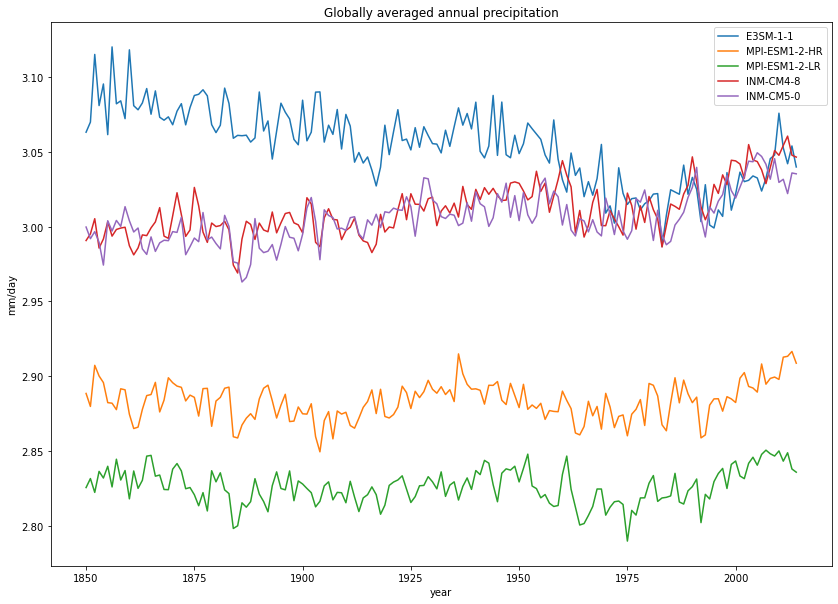

In [22]:
plt.figure(figsize=(14,10))
for infile in infiles[10:15]:
    cube = iris.load_cube(infile, 'precipitation_flux')
    years = np.arange(1850, 2015)
    model = infile.split('/')[8]
    plt.plot(years, cube.data[0:165], label=model)
plt.xlabel('year')
plt.legend()
plt.title('Globally averaged annual precipitation')
plt.ylabel('mm/day')
plt.savefig('/g/data/r87/dbi599/temp/pr_timeseries.png', bbox_inches='tight')

In [9]:
data_dict = {}
for infile in infiles:
    cube = iris.load_cube(infile, 'precipitation_flux')
    data = cube.data[0:165]
    model = infile.split('/')[8]
    start = data[0:20].mean()
    end = data[-20:].mean()
    pct_change = ((end - start) / start) * 100
    data_dict[model] = pct_change

df = pd.DataFrame(data_dict.items(), columns=['Model', 'Change in P'])

In [10]:
df

,Model,Change in P
0,ACCESS-CM2,-0.013296
1,CMCC-CM2-SR5,0.970462
2,CAMS-CSM1-0,0.535498
3,EC-Earth3-Veg-LR,1.380884
4,EC-Earth3-Veg,2.314889
5,EC-Earth3,0.990401
6,ACCESS-ESM1-5,0.178889
7,MPI-ESM-1-2-HAM,-0.487894
8,E3SM-1-0,-0.957413
9,E3SM-1-1-ECA,-0.937397


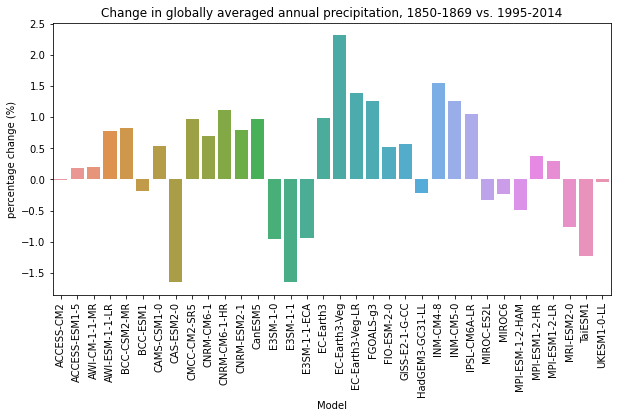

In [21]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x="Model", y="Change in P", data=df.sort_values('Model'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel('percentage change (%)')
plt.title(f"Change in globally averaged annual precipitation, 1850-1869 vs. 1995-2014")
plt.savefig('/g/data/r87/dbi599/temp/pr_change.png', dpi=300, bbox_inches='tight')